# Projeto Oficina Maker
## Estudantes: Felipe Ferro Ramires, Michael da Silva e Verônica Scheifer
## Análise de Dados e Experimentos Big Data


# **Importação**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sp

In [ ]:
df = pd.read_csv("/content/2022-10-01_sigesguarda_-_Base_de_Dados.csv", sep=';', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,20,21,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Informação do dataset**

In [ ]:
df.head()

,QUANTIDADE_OCORRENCIA,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
0,1,2009.0,CIDADE INDUSTRIAL,NaN,NÃO,NÃO,DAVI XAVIER DA SILVA,0,Alarmes,NaN,...,15:14:00,1,NaN,.,CIC,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN
1,1,2009.0,FAZENDINHA,BOSQUE DA FAZENDINHA,SIM,NÃO,CARLOS KLEMTZ,0,Roubo,NaN,...,15:22:00,1,NaN,153,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,NaN,NaN
2,1,2009.0,UBERABA,NaN,NÃO,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,0,Animais,NaN,...,15:59:00,1,NaN,156,CAJURU,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640856.0
3,1,2009.0,SÍTIO CERCADO,NaN,NÃO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,0,Animais,NaN,...,16:13:00,1,NaN,156,BAIRRO NOVO,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640854.0
4,1,2009.0,TATUQUARA,CENTRO DE ESPORTE E LAZER SANTA RITA,SIM,NÃO,CARLOS MUNHOZ DA ROCHA,0,Alarmes,NaN,...,16:29:00,1,NaN,.,PINHEIRINHO,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418052 entries, 0 to 418051
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   QUANTIDADE_OCORRENCIA      418052 non-null  int64  
 1   ATENDIMENTO_ANO            418031 non-null  float64
 2   ATENDIMENTO_BAIRRO_NOME    417907 non-null  object 
 3   EQUIPAMENTO_URBANO_NOME    149823 non-null  object 
 4   FLAG_EQUIPAMENTO_URBANO    418052 non-null  object 
 5   FLAG_FLAGRANTE             418052 non-null  object 
 6   LOGRADOURO_NOME            418052 non-null  object 
 7   NATUREZA1_DEFESA_CIVIL     418052 non-null  int64  
 8   NATUREZA1_DESCRICAO        418052 non-null  object 
 9   NATUREZA2_DEFESA_CIVIL     21801 non-null   float64
 10  NATUREZA2_DESCRICAO        21801 non-null   object 
 11  NATUREZA3_DEFESA_CIVIL     1644 non-null    float64
 12  NATUREZA3_DESCRICAO        1644 non-null    object 
 13  NATUREZA4_DEFESA_CIVIL     27

In [ ]:
df.describe()

,QUANTIDADE_OCORRENCIA,ATENDIMENTO_ANO,NATUREZA1_DEFESA_CIVIL,NATUREZA2_DEFESA_CIVIL,NATUREZA3_DEFESA_CIVIL,NATUREZA4_DEFESA_CIVIL,NATUREZA5_DEFESA_CIVIL,OCORRENCIA_ANO,OCORRENCIA_CODIGO,OCORRENCIA_MES,NUMERO_PROTOCOLO_156
count,418052.0,418031.000000,418052.000000,21801.000000,1644.000000,279.000000,61.0,418052.000000,418052.000000,418052.000000,1.210300e+04
mean,1.0,2016.639874,0.025923,0.019999,0.013382,0.014337,0.0,2016.639794,209318.183757,6.366476,6.218048e+06
std,0.0,4.143803,0.158905,0.140000,0.114939,0.119089,0.0,4.143745,120790.597196,3.373333,2.481947e+06
min,1.0,2009.000000,0.000000,0.000000,0.000000,0.000000,0.0,2009.000000,1.000000,1.000000,2.640854e+06
25%,1.0,2013.000000,0.000000,0.000000,0.000000,0.000000,0.0,2013.000000,104701.750000,3.000000,3.699468e+06
50%,1.0,2018.000000,0.000000,0.000000,0.000000,0.000000,0.0,2018.000000,209364.500000,6.000000,6.159427e+06
75%,1.0,2020.000000,0.000000,0.000000,0.000000,0.000000,0.0,2020.000000,313912.250000,9.000000,8.738844e+06
max,1.0,2022.000000,1.000000,1.000000,1.000000,1.000000,0.0,2022.000000,418518.000000,12.000000,9.698230e+06


# **Tratamento de dados**

Contagem de dados nulos

In [ ]:
def contagemNulos(tabela):
  for col in tabela.columns:
   if tabela[col].isnull().sum():
    total_null=tabela[col].isnull().sum() 
    print('Column: {} total null {}, i.e. {} %'.format(col,total_null,round(total_null*100/len(df),2)))

In [ ]:
dfContagemNulos = contagemNulos(df)

Column: ATENDIMENTO_ANO total null 21, i.e. 0.01 %
Column: ATENDIMENTO_BAIRRO_NOME total null 145, i.e. 0.03 %
Column: EQUIPAMENTO_URBANO_NOME total null 268229, i.e. 64.16 %
Column: NATUREZA2_DEFESA_CIVIL total null 396251, i.e. 94.79 %
Column: NATUREZA2_DESCRICAO total null 396251, i.e. 94.79 %
Column: NATUREZA3_DEFESA_CIVIL total null 416408, i.e. 99.61 %
Column: NATUREZA3_DESCRICAO total null 416408, i.e. 99.61 %
Column: NATUREZA4_DEFESA_CIVIL total null 417773, i.e. 99.93 %
Column: NATUREZA4_DESCRICAO total null 417773, i.e. 99.93 %
Column: NATUREZA5_DEFESA_CIVIL total null 417991, i.e. 99.99 %
Column: NATUREZA5_DESCRICAO total null 417991, i.e. 99.99 %
Column: SUBCATEGORIA1_DESCRICAO total null 129090, i.e. 30.88 %
Column: SUBCATEGORIA2_DESCRICAO total null 404636, i.e. 96.79 %
Column: SUBCATEGORIA3_DESCRICAO total null 417115, i.e. 99.78 %
Column: SUBCATEGORIA4_DESCRICAO total null 417918, i.e. 99.97 %
Column: SUBCATEGORIA5_DESCRICAO total null 418022, i.e. 99.99 %
Column: OPERA

## **Análise de variáveis com quantidades agrupadas**

- Tratmentos de dados e criação de um dataframe com as quantidades agrupadas

In [ ]:
df['OCORRENCIA_DATA'] = pd.to_datetime(df.OCORRENCIA_DATA, format='%Y-%m-%d')

In [ ]:
df['OCORRENCIA_DATA'] = df['OCORRENCIA_DATA'].dt.strftime('%Y-%m-%d')

In [ ]:
df['OCORRENCIA_DATA']

0         2009-01-01
1         2009-01-01
2         2009-01-01
3         2009-01-01
4         2009-01-01
             ...    
418047    2022-09-23
418048    2022-09-23
418049    2022-09-23
418050    2022-09-23
418051    2022-09-23
Name: OCORRENCIA_DATA, Length: 418052, dtype: object

In [ ]:
df2 = df.groupby(['ATENDIMENTO_ANO','OCORRENCIA_ANO', "ATENDIMENTO_BAIRRO_NOME", "FLAG_FLAGRANTE", "NATUREZA1_DESCRICAO", "OCORRENCIA_DATA", "OCORRENCIA_DIA_SEMANA", "REGIONAL_FATO_NOME" ])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
df2

,ATENDIMENTO_ANO,OCORRENCIA_ANO,ATENDIMENTO_BAIRRO_NOME,FLAG_FLAGRANTE,NATUREZA1_DESCRICAO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,REGIONAL_FATO_NOME,QUANTIDADE_OCORRENCIA
0,2009.0,2009,ABRANCHES,NÃO,AIFU,2009-05-17,DOMINGO,BOA VISTA,1
1,2009.0,2009,ABRANCHES,NÃO,AIFU,2009-05-28,QUINTA,BOA VISTA,1
2,2009.0,2009,ABRANCHES,NÃO,AIFU,2009-07-23,QUINTA,BOA VISTA,1
3,2009.0,2009,ABRANCHES,NÃO,Alagamento,2009-11-16,SEGUNDA,BOA VISTA,1
4,2009.0,2009,ABRANCHES,NÃO,Alarmes,2009-09-03,QUINTA,BOA VISTA,1
...,...,...,...,...,...,...,...,...,...
323776,2022.0,2022,ÁGUA VERDE,SIM,Trânsito,2022-05-07,SÁBADO,PORTÃO,1
323777,2022.0,2022,ÁGUA VERDE,SIM,Veículo,2022-03-24,QUINTA,PORTÃO,1
323778,2022.0,2022,ÁGUA VERDE,SIM,Violação de Medida Protetiva Lei Maria da Penha,2022-03-26,SÁBADO,PORTÃO,1
323779,2022.0,2022,ÁGUA VERDE,SIM,Violação de Medida Protetiva Lei Maria da Penha,2022-04-11,SEGUNDA,PORTÃO,1


- Quantidade de ocorrencias atendidas por ano (ATENDIMENTO_ANO)

In [ ]:
ocorrenciasAtendidasPorAno = df.groupby(['ATENDIMENTO_ANO'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasAtendidasPorAno = ocorrenciasAtendidasPorAno.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Atendidas_Por_Ano'}, axis=1)

In [ ]:
ocorrenciasAtendidasPorAno

,ATENDIMENTO_ANO,Quantidade_Ocorrencias_Atendidas_Por_Ano
0,2009.0,24903
1,2010.0,22531
2,2011.0,21481
3,2012.0,19778
4,2013.0,24468
5,2014.0,25292
6,2015.0,25566
7,2016.0,21470
8,2017.0,22133
9,2018.0,24155


In [ ]:
ocorrenciasAtendidasPorAno.describe()

,ATENDIMENTO_ANO,Quantidade_Ocorrencias_Atendidas_Por_Ano
count,14.0000,14.000000
mean,2015.5000,29859.357143
std,4.1833,12808.834923
min,2009.0000,19778.000000
25%,2012.2500,22232.500000
50%,2015.5000,24685.500000
75%,2018.7500,31707.000000
max,2022.0000,58726.000000


- Quantidade de ocorrencias registradas por ano (OCORRENCIA_ANO)

In [ ]:
ocorrenciasRegistradasPorAno = df.groupby(['OCORRENCIA_ANO'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasRegistradasPorAno = ocorrenciasRegistradasPorAno.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Registradas_Por_Ano'}, axis=1)

In [ ]:
ocorrenciasRegistradasPorAno

,OCORRENCIA_ANO,Quantidade_Ocorrencias_Registradas_Por_Ano
0,2009,24903
1,2010,22531
2,2011,21484
3,2012,19776
4,2013,24470
5,2014,25303
6,2015,25566
7,2016,21469
8,2017,22137
9,2018,24153


In [ ]:
ocorrenciasRegistradasPorAno.describe()

,OCORRENCIA_ANO,Quantidade_Ocorrencias_Registradas_Por_Ano
count,14.0000,14.000000
mean,2015.5000,29860.857143
std,4.1833,12808.647216
min,2009.0000,19776.000000
25%,2012.2500,22235.500000
50%,2015.5000,24686.500000
75%,2018.7500,31713.000000
max,2022.0000,58731.000000


- Quantidade de ocorrencias por bairro (ATENDIMENTO_BAIRRO_NOME)

In [ ]:
ocorrenciasPorBairro = df.groupby(['ATENDIMENTO_BAIRRO_NOME'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorBairro = ocorrenciasPorBairro.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Registradas_Por_Bairro'}, axis=1)

In [ ]:
ocorrenciasPorBairro

,ATENDIMENTO_BAIRRO_NOME,Quantidade_Ocorrencias_Registradas_Por_Bairro
0,JARDIM OSASCO,1
1,JARDIM PEDRO DEMETE,1
2,ABRANCHES,2134
3,AFONSO PENA,1
4,AFONSO PENA,1
...,...,...
184,VISTA ALEGRE,1498
185,XAXIM,6742
186,fanny,1
187,ÁGUA VERDE,7616


In [ ]:
ocorrenciasPorBairro.describe()

,Quantidade_Ocorrencias_Registradas_Por_Bairro
count,189.000000
mean,2211.148148
std,6522.940097
min,1.000000
25%,1.000000
50%,2.000000
75%,2043.000000
max,72118.000000


- Quantidade de ocorrencias com flagrante (FLAG_FLAGRANTE)

In [ ]:
ocorrenciasFlagrante = df.groupby(['FLAG_FLAGRANTE'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasFlagrante = ocorrenciasFlagrante.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Flagrante'}, axis=1)

In [ ]:
ocorrenciasFlagrante

,FLAG_FLAGRANTE,Quantidade_Ocorrencias_Flagrante
0,NÃO,399224
1,SIM,18828


- Quantidade de ocorrencias por tipo (NATUREZA1_DESCRICAO)

In [ ]:
ocorrenciasPorTipo = df.groupby(['NATUREZA1_DESCRICAO'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorTipo = ocorrenciasPorTipo.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Tipo'}, axis=1)

In [ ]:
ocorrenciasPorTipo

,NATUREZA1_DESCRICAO,Quantidade_Ocorrencias_Por_Tipo
0,AIFU,662
1,Abalo Sísmico,2
2,Abandono de função,4
3,Abandono de incapaz,157
4,Abuso de incapazes,51
...,...,...
182,Vistoria,3741
183,ZELADORIA URBANA,1377
184,Óbito,156
185,Óbito (Defesa Civil),1


In [ ]:
ocorrenciasPorTipo.describe()

,Quantidade_Ocorrencias_Por_Tipo
count,187.000000
mean,2235.572193
std,7640.708392
min,1.000000
25%,11.000000
50%,69.000000
75%,553.500000
max,67774.000000


- Quantidade de ocorrencias por dia (OCORRENCIA_DATA)

In [ ]:
ocorrenciasPorDia = df.groupby(['OCORRENCIA_DATA'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorDia = ocorrenciasPorDia.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Dia'}, axis=1)

In [ ]:
ocorrenciasPorDia

,OCORRENCIA_DATA,Quantidade_Ocorrencias_Por_Dia
0,2009-01-01,30
1,2009-01-02,81
2,2009-01-03,96
3,2009-01-04,93
4,2009-01-05,59
...,...,...
5009,2022-09-19,122
5010,2022-09-20,161
5011,2022-09-21,138
5012,2022-09-22,159


In [ ]:
ocorrenciasPorDia.describe()

,Quantidade_Ocorrencias_Por_Dia
count,5014.000000
mean,83.376945
std,44.581395
min,2.000000
25%,56.000000
50%,69.000000
75%,95.000000
max,606.000000


- Quantidade de ocorrencias por dia da semana (OCORRENCIA_DIA_SEMANA)

In [ ]:
ocorrenciasPorDiaDaSemana = df.groupby(['OCORRENCIA_DIA_SEMANA'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorDiaDaSemana = ocorrenciasPorDiaDaSemana.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Dia_Da_Semana'}, axis=1)

In [ ]:
ocorrenciasPorDiaDaSemana

,OCORRENCIA_DIA_SEMANA,Quantidade_Ocorrencias_Por_Dia_Da_Semana
0,DOMINGO,64434
1,QUARTA,57052
2,QUINTA,59400
3,SEGUNDA,53347
4,SEXTA,61296
5,SÁBADO,67534
6,TERÇA,54989


- Quantidade de ocorrencias por regional (REGIONAL_FATO_NOME)

In [ ]:
ocorrenciasPorRegional = df.groupby(['REGIONAL_FATO_NOME'])['QUANTIDADE_OCORRENCIA'].sum().reset_index()

In [ ]:
ocorrenciasPorRegional = ocorrenciasPorRegional.rename({'QUANTIDADE_OCORRENCIA': 'Quantidade_Ocorrencias_Por_Regional'}, axis=1)

In [ ]:
ocorrenciasPorRegional

,REGIONAL_FATO_NOME,Quantidade_Ocorrencias_Por_Regional
0,BAIRRO NOVO,29759
1,BOA VISTA,42943
2,BOQUEIRÃO,38760
3,CAJURU,36205
4,CIC,31450
5,Cajuru,1
6,MATRIZ,131676
7,PINHEIRINHO,29208
8,PORTÃO,37994
9,Pinheirinho,1


# **Análise descritiva de dados**

In [ ]:
tabelas = [ocorrenciasAtendidasPorAno, ocorrenciasRegistradasPorAno, ocorrenciasPorBairro, ocorrenciasFlagrante,
           ocorrenciasPorTipo, ocorrenciasPorDia, ocorrenciasPorDiaDaSemana, ocorrenciasPorRegional]

### - Medidas de posição

In [ ]:
#Média

def calculaMedia(tabela):

    media = tabela.mean()

    media = pd.DataFrame({'metricas':media.index, 'media':media.values})
    
    return media

In [ ]:
medias = []
for i in tabelas: 
  medias.append(calculaMedia(i))
  
dfMedia = pd.concat(medias)
dfMedia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,metricas,media
0,ATENDIMENTO_ANO,2015.500000
1,Quantidade_Ocorrencias_Atendidas_Por_Ano,29859.357143
0,OCORRENCIA_ANO,2015.500000
1,Quantidade_Ocorrencias_Registradas_Por_Ano,29860.857143
0,Quantidade_Ocorrencias_Registradas_Por_Bairro,2211.148148
0,Quantidade_Ocorrencias_Flagrante,209026.000000
0,Quantidade_Ocorrencias_Por_Tipo,2235.572193
0,Quantidade_Ocorrencias_Por_Dia,83.376945
0,Quantidade_Ocorrencias_Por_Dia_Da_Semana,59721.714286
0,Quantidade_Ocorrencias_Por_Regional,29860.071429


In [ ]:
#Mediana

def calculaMediana(tabela):

    mediana = tabela.median()

    mediana = pd.DataFrame({'metricas':mediana.index, 'mediana':mediana.values})
    
    return mediana

In [ ]:
medianas = []
for i in tabelas: 
  medianas.append(calculaMediana(i))
  
dfMediana = pd.concat(medianas)
dfMediana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_o

,metricas,mediana
0,ATENDIMENTO_ANO,2015.5
1,Quantidade_Ocorrencias_Atendidas_Por_Ano,24685.5
0,OCORRENCIA_ANO,2015.5
1,Quantidade_Ocorrencias_Registradas_Por_Ano,24686.5
0,Quantidade_Ocorrencias_Registradas_Por_Bairro,2.0
0,Quantidade_Ocorrencias_Flagrante,209026.0
0,Quantidade_Ocorrencias_Por_Tipo,69.0
0,Quantidade_Ocorrencias_Por_Dia,69.0
0,Quantidade_Ocorrencias_Por_Dia_Da_Semana,59400.0
0,Quantidade_Ocorrencias_Por_Regional,29834.5


### - Medidas de dispersão

In [ ]:
#Variancia (valores ao quadrado)
#Distância dos termos com relação a média
#Quanto menor, melhor e mais próximo a média

def calculaVariancia(tabela):

    var = tabela.var()

    var = pd.DataFrame({'metricas':var.index, 'var':var.values})
    
    return var

In [ ]:
variancias = []
for i in tabelas: 
  variancias.append(calculaVariancia(i))
  
dfVariancia = pd.concat(variancias)
dfVariancia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,metricas,var
0,ATENDIMENTO_ANO,1.750000e+01
1,Quantidade_Ocorrencias_Atendidas_Por_Ano,1.640663e+08
0,OCORRENCIA_ANO,1.750000e+01
1,Quantidade_Ocorrencias_Registradas_Por_Ano,1.640614e+08
0,Quantidade_Ocorrencias_Registradas_Por_Bairro,4.254875e+07
0,Quantidade_Ocorrencias_Flagrante,7.235056e+10
0,Quantidade_Ocorrencias_Por_Tipo,5.838042e+07
0,Quantidade_Ocorrencias_Por_Dia,1.987501e+03
0,Quantidade_Ocorrencias_Por_Dia_Da_Semana,2.599704e+07
0,Quantidade_Ocorrencias_Por_Regional,1.128722e+09


In [ ]:
#Desvio Padrao (√ Variancia - mesma unidade media)
#Distância dos termos com relação a média
#Quanto menor, melhor e mais próximo a média

def calculateDesvioPadrao(tabela):

    desvioP = tabela.std()

    desvioP = pd.DataFrame({'metricas':desvioP.index, 'desvioP':desvioP.values})

    return desvioP 

In [ ]:
desvios = []
for i in tabelas: 
  desvios.append(calculateDesvioPadrao(i))
  
dfDesvio = pd.concat(desvios)
dfDesvio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,metricas,desvioP
0,ATENDIMENTO_ANO,4.183300
1,Quantidade_Ocorrencias_Atendidas_Por_Ano,12808.834923
0,OCORRENCIA_ANO,4.183300
1,Quantidade_Ocorrencias_Registradas_Por_Ano,12808.647216
0,Quantidade_Ocorrencias_Registradas_Por_Bairro,6522.940097
0,Quantidade_Ocorrencias_Flagrante,268980.591136
0,Quantidade_Ocorrencias_Por_Tipo,7640.708392
0,Quantidade_Ocorrencias_Por_Dia,44.581395
0,Quantidade_Ocorrencias_Por_Dia_Da_Semana,5098.729604
0,Quantidade_Ocorrencias_Por_Regional,33596.459716


In [ ]:
#Quantis
def calculaQuantil(tabela):

    q1 = tabela.quantile(0.25)
    q1Df = pd.DataFrame({'metricas':q1.index, 'q1':q1.values})

    q2 = tabela.quantile(0.50)
    q2Df = pd.DataFrame({'metricas':q2.index, 'q2':q1.values})

    q3 = tabela.quantile(0.75)
    q3Df = pd.DataFrame({'metricas':q3.index, 'q3':q3.values})

    quantile = pd.concat([q1Df['metricas'], q1Df['q1'], q2Df['q2'], q3Df['q3']], axis=1, ignore_index=True)
    quantile.columns = ['metricas', 'quantil1(25%)', 'quantil2(50%)', 'quantil3(75%)']
    
    return quantile

In [ ]:
quantis = []
for i in tabelas: 
  quantis.append(calculaQuantil(i))
  
dfQuantis = pd.concat(quantis)
dfQuantis

,metricas,quantil1(25%),quantil2(50%),quantil3(75%)
0,ATENDIMENTO_ANO,2012.25,2012.25,2018.75
1,Quantidade_Ocorrencias_Atendidas_Por_Ano,22232.50,22232.50,31707.00
0,OCORRENCIA_ANO,2012.25,2012.25,2018.75
1,Quantidade_Ocorrencias_Registradas_Por_Ano,22235.50,22235.50,31713.00
0,Quantidade_Ocorrencias_Registradas_Por_Bairro,1.00,1.00,2043.00
0,Quantidade_Ocorrencias_Flagrante,113927.00,113927.00,304125.00
0,Quantidade_Ocorrencias_Por_Tipo,11.00,11.00,553.50
0,Quantidade_Ocorrencias_Por_Dia,56.00,56.00,95.00
0,Quantidade_Ocorrencias_Por_Dia_Da_Semana,56020.50,56020.50,62865.00
0,Quantidade_Ocorrencias_Por_Regional,2747.75,2747.75,37546.75


# **Funções para os gráficos**

In [ ]:
def criaHistogramaComBins(title, table, bins, color, collumn = None):

    plt.figure(figsize=(10,5))

    plt.title(title, fontsize =13)

    if collumn is None: 

        plt.hist((table), bins = np.array(bins), alpha = 0.8, color = color)

    else:

        plt.hist((table[collumn]), bins = np.array(bins), alpha = 0.8, color = color)
        
    plt.show

In [ ]:
def plotScatter(collumnX, collumnY, table, title, color):
    
    sns.set_style('white')

    plt.figure(figsize= (10, 10))

    plt.title(title, fontsize = 13)

    sns.scatterplot(x=collumnX, y=collumnY, data= table, color = color)

    plt.show()

In [ ]:
def criaGraficoPizza(table, y, label, title):
    mycolors = ['plum', 'bisque']

    plt.figure(figsize=(15,10), dpi=80)

    plt.pie(table[y], labels = table[label], autopct = '%1.1f%%', colors = mycolors, frame = False)

    #plt.legend()

    plt.title(title)

    plt.rcParams['axes.facecolor'] = 'white'

    plt.show()

In [ ]:
def criaGraficoLinha(table, x, y, title, xLabel, yLabel):
    plt.figure(figsize=(10,5))

    plt.plot(table[x], table[y])

    plt.title(title)

    plt.xlabel(xLabel)

    plt.ylabel(yLabel)
    
    plt.show()

In [ ]:
def criaGraficoDistribuicao(table, coluna):
    plt.figure(figsize=(10,5))
    sns.distplot(table[coluna])

In [ ]:
def criaGraficoBoxplot(table, x):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=table, x=x)

# **Visualizações dos dados**

####**Ocorrencias Atendidas Por Ano**

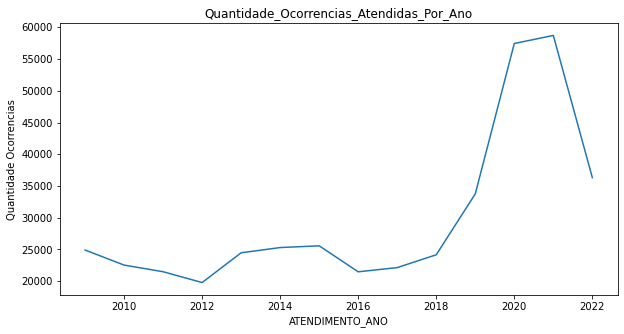

In [ ]:
criaGraficoLinha(ocorrenciasAtendidasPorAno, 'ATENDIMENTO_ANO', 'Quantidade_Ocorrencias_Atendidas_Por_Ano', 'Quantidade_Ocorrencias_Atendidas_Por_Ano', 'ATENDIMENTO_ANO', 'Quantidade Ocorrencias')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


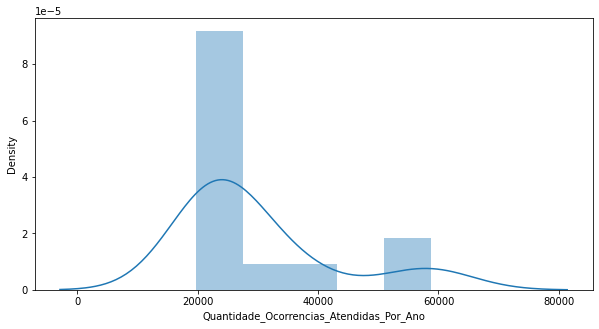

In [ ]:
criaGraficoDistribuicao(ocorrenciasAtendidasPorAno, 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

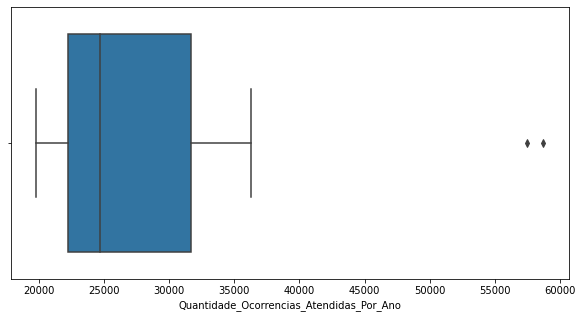

In [ ]:
criaGraficoBoxplot(ocorrenciasAtendidasPorAno, 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

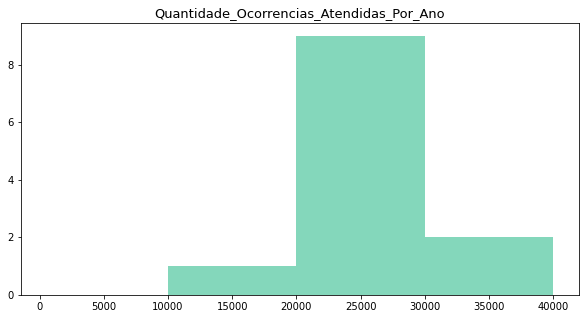

In [ ]:
bins = [500, 10000, 20000, 30000, 40000]

criaHistogramaComBins('Quantidade_Ocorrencias_Atendidas_Por_Ano', ocorrenciasAtendidasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

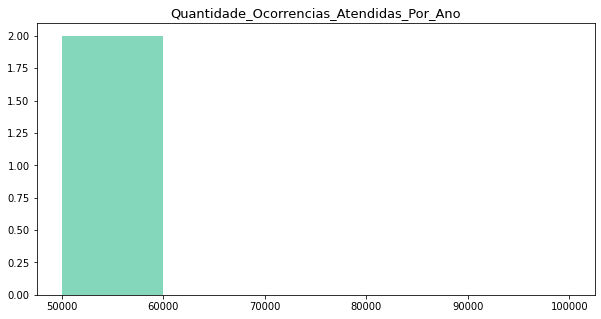

In [ ]:
bins = [50000, 60000, 70000, 80000, 100000]

criaHistogramaComBins('Quantidade_Ocorrencias_Atendidas_Por_Ano', ocorrenciasAtendidasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Atendidas_Por_Ano')

####**Ocorrencias Registradas Por Ano**


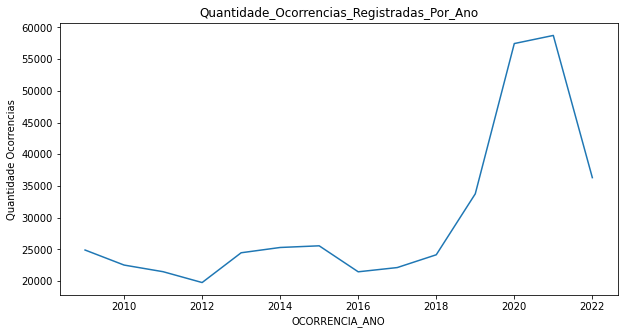

In [ ]:
criaGraficoLinha(ocorrenciasRegistradasPorAno, 'OCORRENCIA_ANO', 'Quantidade_Ocorrencias_Registradas_Por_Ano', 'Quantidade_Ocorrencias_Registradas_Por_Ano', 'OCORRENCIA_ANO', 'Quantidade Ocorrencias')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


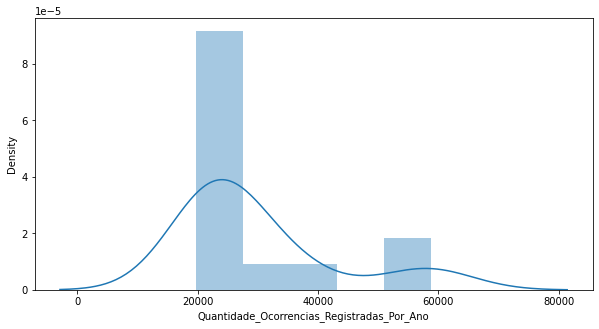

In [ ]:
criaGraficoDistribuicao(ocorrenciasRegistradasPorAno, 'Quantidade_Ocorrencias_Registradas_Por_Ano')

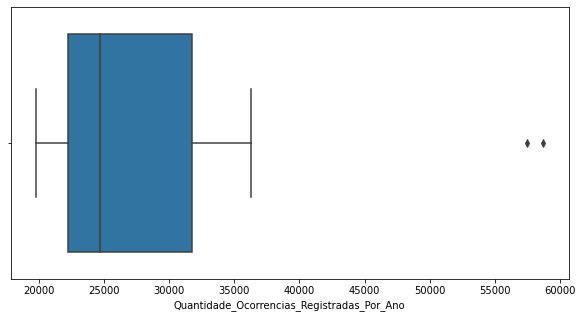

In [ ]:
criaGraficoBoxplot(ocorrenciasRegistradasPorAno, 'Quantidade_Ocorrencias_Registradas_Por_Ano')

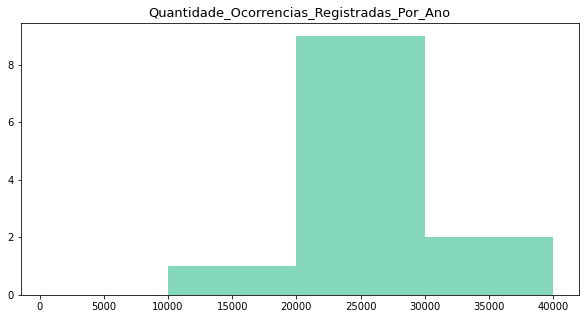

In [ ]:
bins = [500, 10000, 20000, 30000, 40000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Ano', ocorrenciasRegistradasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Ano')

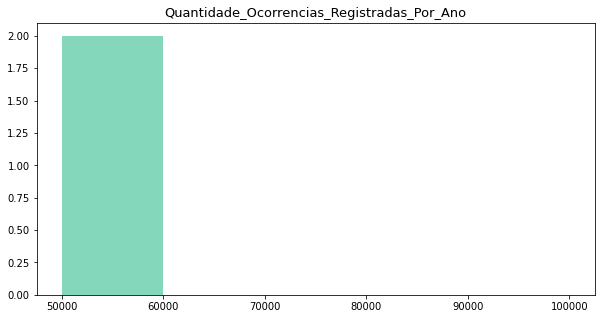

In [ ]:
bins = [50000, 60000, 70000, 80000, 100000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Ano', ocorrenciasRegistradasPorAno, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Ano')

####**Ocorrencias Por Bairro**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


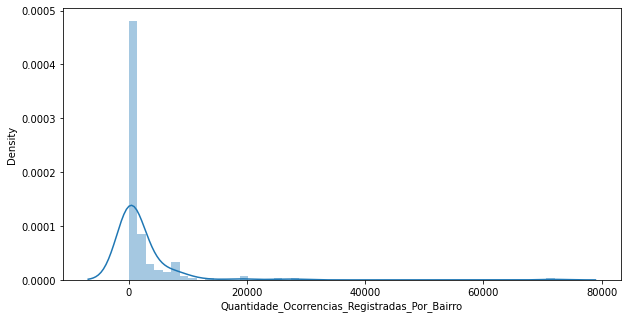

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorBairro, 'Quantidade_Ocorrencias_Registradas_Por_Bairro')

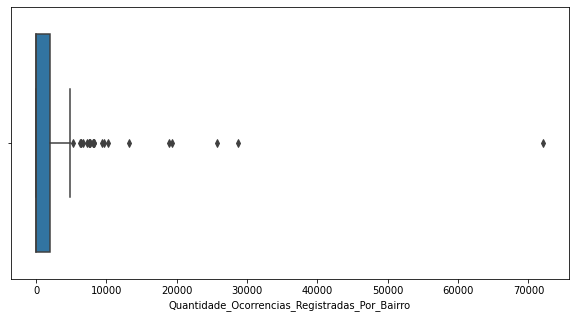

In [ ]:
criaGraficoBoxplot(ocorrenciasPorBairro, 'Quantidade_Ocorrencias_Registradas_Por_Bairro')

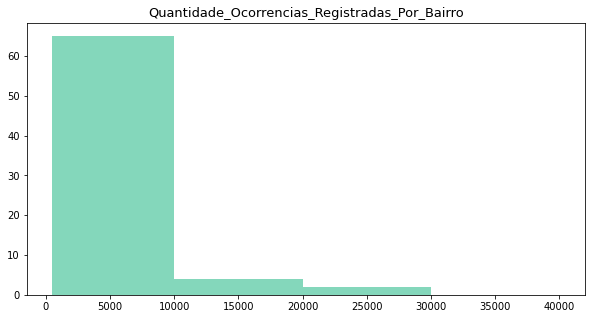

In [ ]:
bins = [500, 10000, 20000, 30000, 40000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Bairro', ocorrenciasPorBairro, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Bairro')


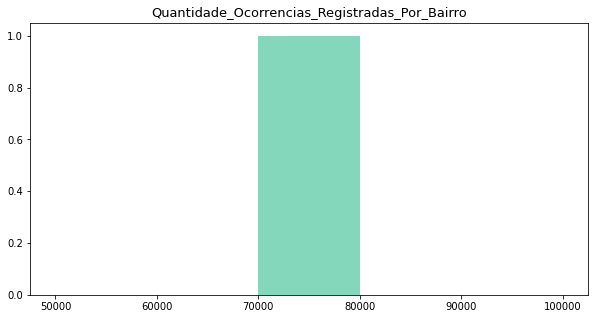

In [ ]:
bins = [50000, 60000, 70000, 80000, 100000]

criaHistogramaComBins('Quantidade_Ocorrencias_Registradas_Por_Bairro', ocorrenciasPorBairro, bins, 'mediumaquamarine', 'Quantidade_Ocorrencias_Registradas_Por_Bairro')

####**Ocorrencias Flagrante**

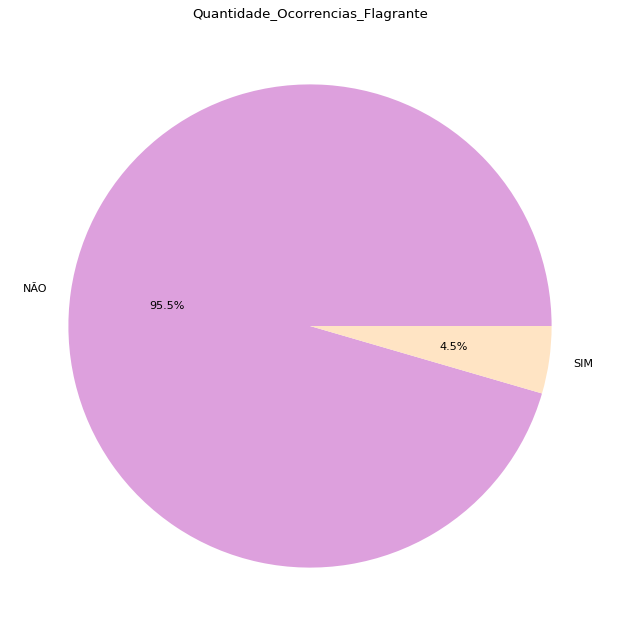

In [ ]:
quantidadeOcorrenciasFlagranteGraficoPizza = criaGraficoPizza(ocorrenciasFlagrante, 'Quantidade_Ocorrencias_Flagrante', 'FLAG_FLAGRANTE', 'Quantidade_Ocorrencias_Flagrante')

####**Ocorrencias Por Tipo**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


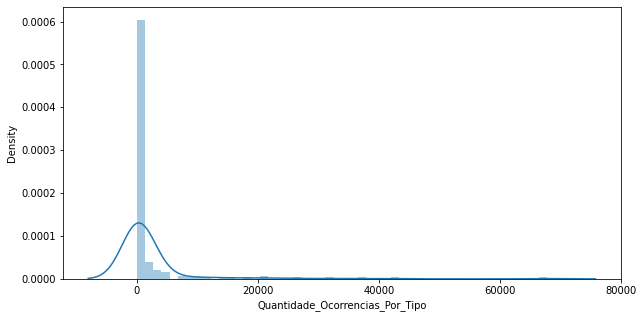

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorTipo, 'Quantidade_Ocorrencias_Por_Tipo')

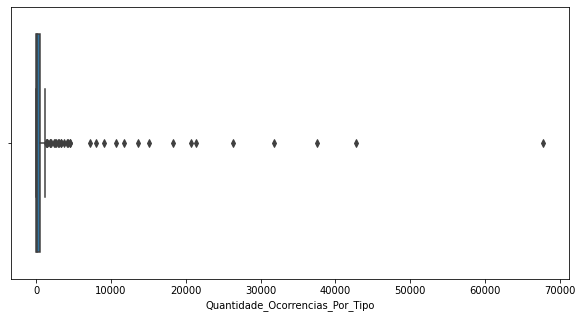

In [ ]:
criaGraficoBoxplot(ocorrenciasPorTipo, 'Quantidade_Ocorrencias_Por_Tipo')

####**Ocorrencias Por Dia**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


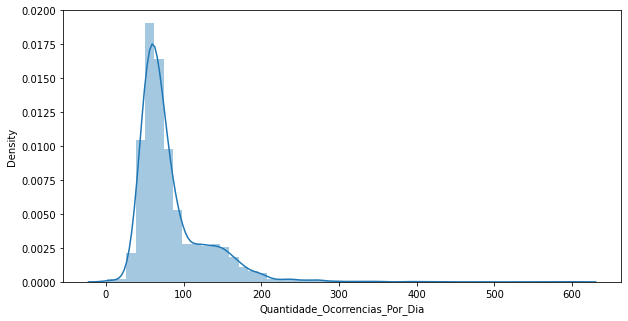

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorDia, 'Quantidade_Ocorrencias_Por_Dia')

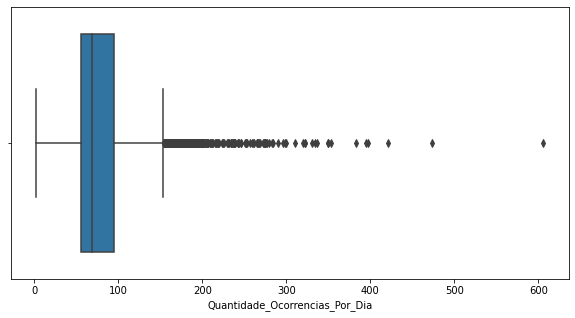

In [ ]:
criaGraficoBoxplot(ocorrenciasPorDia, 'Quantidade_Ocorrencias_Por_Dia')

####**Ocorrencias Por Dia Da Semana**


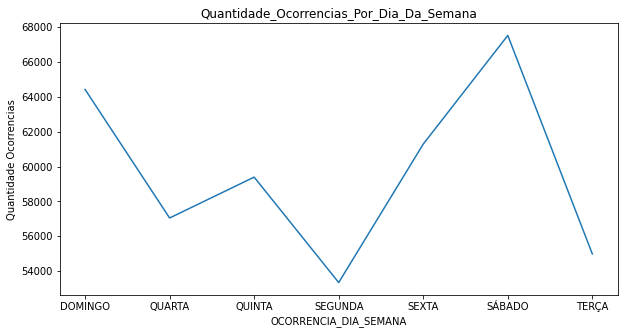

In [ ]:
criaGraficoLinha(ocorrenciasPorDiaDaSemana, 'OCORRENCIA_DIA_SEMANA', 'Quantidade_Ocorrencias_Por_Dia_Da_Semana', 'Quantidade_Ocorrencias_Por_Dia_Da_Semana', 'OCORRENCIA_DIA_SEMANA', 'Quantidade Ocorrencias')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


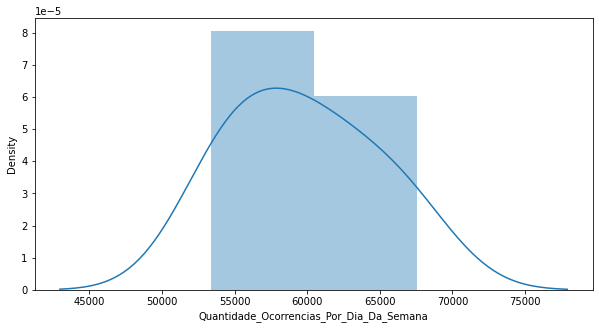

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorDiaDaSemana, 'Quantidade_Ocorrencias_Por_Dia_Da_Semana')

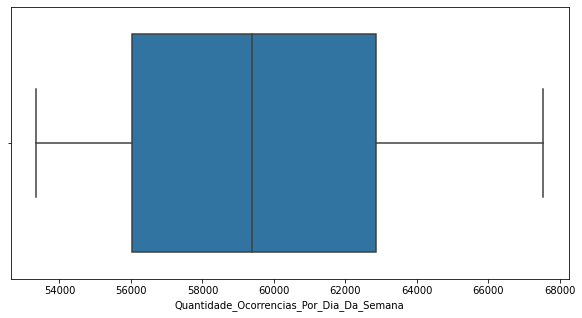

In [ ]:
criaGraficoBoxplot(ocorrenciasPorDiaDaSemana, 'Quantidade_Ocorrencias_Por_Dia_Da_Semana')

####**Ocorrencias Por Regional**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


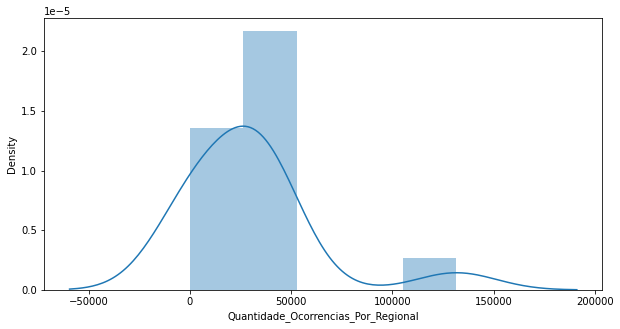

In [ ]:
criaGraficoDistribuicao(ocorrenciasPorRegional, 'Quantidade_Ocorrencias_Por_Regional')

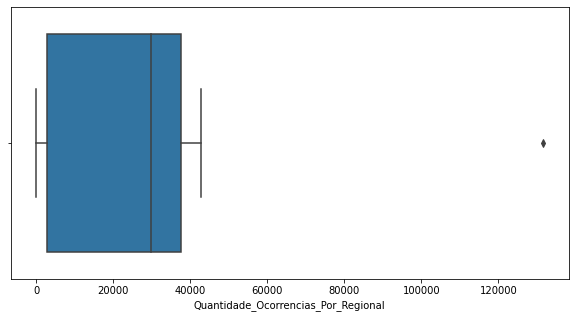

In [ ]:
criaGraficoBoxplot(ocorrenciasPorRegional, 'Quantidade_Ocorrencias_Por_Regional')

# **Análises com Spark**

### **Configurando o Spark**

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

### **Informação do dataset**

In [ ]:
sparkDF=spark.createDataFrame(df2) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- ATENDIMENTO_ANO: double (nullable = true)
 |-- OCORRENCIA_ANO: long (nullable = true)
 |-- ATENDIMENTO_BAIRRO_NOME: string (nullable = true)
 |-- FLAG_FLAGRANTE: string (nullable = true)
 |-- NATUREZA1_DESCRICAO: string (nullable = true)
 |-- OCORRENCIA_DATA: string (nullable = true)
 |-- OCORRENCIA_DIA_SEMANA: string (nullable = true)
 |-- REGIONAL_FATO_NOME: string (nullable = true)
 |-- QUANTIDADE_OCORRENCIA: long (nullable = true)

+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|ATENDIMENTO_ANO|OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|         2009.0|          2009|     

In [ ]:
sparkDF.head()

Row(ATENDIMENTO_ANO=2009.0, OCORRENCIA_ANO=2009, ATENDIMENTO_BAIRRO_NOME='ABRANCHES', FLAG_FLAGRANTE='NÃO', NATUREZA1_DESCRICAO='AIFU', OCORRENCIA_DATA='2009-05-17', OCORRENCIA_DIA_SEMANA='DOMINGO', REGIONAL_FATO_NOME='BOA VISTA', QUANTIDADE_OCORRENCIA=1)

In [ ]:
sparkDF.describe().show()

+-------+------------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|summary|   ATENDIMENTO_ANO|    OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+-------+------------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|  count|            323781|            323781|                 323781|        323781|             323781|         323781|               323781|            323781|               323781|
|   mean|2016.2981706770934|2016.2980749333653|                   null|          null|               null|           null|                 null|              null|   1.2906439846686495|
| stddev|  4.12142061320426| 4.121393441914671|                   null

In [ ]:
sparkDF.printSchema()

root
 |-- ATENDIMENTO_ANO: double (nullable = true)
 |-- OCORRENCIA_ANO: long (nullable = true)
 |-- ATENDIMENTO_BAIRRO_NOME: string (nullable = true)
 |-- FLAG_FLAGRANTE: string (nullable = true)
 |-- NATUREZA1_DESCRICAO: string (nullable = true)
 |-- OCORRENCIA_DATA: string (nullable = true)
 |-- OCORRENCIA_DIA_SEMANA: string (nullable = true)
 |-- REGIONAL_FATO_NOME: string (nullable = true)
 |-- QUANTIDADE_OCORRENCIA: long (nullable = true)



### **Tratamento de dados**

- Contagem de linhas duplicadas

In [ ]:
import pyspark.sql.functions as funcs
sparkDF.groupby(sparkDF.columns).count().where(funcs.col('count') > 1).select(funcs.sum('count')).show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



- Achar colunas numericas e categoricas

In [ ]:
colunas_numericas = list()
colunas_categoricas = list()
for col_ in sparkDF.columns:
    if sparkDF.select(col_).dtypes[0][1] != "string":
        colunas_numericas.append(col_)
    else:
        colunas_categoricas.append(col_)
        
print("Colunas Numericas",colunas_numericas)
print("Colunas Categoricas",colunas_categoricas)

Colunas Numericas ['ATENDIMENTO_ANO', 'OCORRENCIA_ANO', 'QUANTIDADE_OCORRENCIA']
Colunas Categoricas ['ATENDIMENTO_BAIRRO_NOME', 'FLAG_FLAGRANTE', 'NATUREZA1_DESCRICAO', 'OCORRENCIA_DATA', 'OCORRENCIA_DIA_SEMANA', 'REGIONAL_FATO_NOME']


- Contagem de valores nulos

In [ ]:
from pyspark.sql.functions import *
print(sparkDF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in sparkDF.columns]).show())

+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|ATENDIMENTO_ANO|OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|              0|             0|                      0|             0|                  0|              0|                    0|                 0|                    0|
+---------------+--------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+

None


### **Análise descritiva de dados**

Métricas

In [ ]:
sparkDF.summary().show()

+-------+------------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|summary|   ATENDIMENTO_ANO|    OCORRENCIA_ANO|ATENDIMENTO_BAIRRO_NOME|FLAG_FLAGRANTE|NATUREZA1_DESCRICAO|OCORRENCIA_DATA|OCORRENCIA_DIA_SEMANA|REGIONAL_FATO_NOME|QUANTIDADE_OCORRENCIA|
+-------+------------------+------------------+-----------------------+--------------+-------------------+---------------+---------------------+------------------+---------------------+
|  count|            323781|            323781|                 323781|        323781|             323781|         323781|               323781|            323781|               323781|
|   mean|2016.2981706770934|2016.2980749333653|                   null|          null|               null|           null|                 null|              null|   1.2906439846686495|
| stddev|  4.12142061320426| 4.121393441914671|                   null